<a href="https://colab.research.google.com/github/necipsahamettinkucuk/GDSC-Solution-Challenge-2024/blob/main/GDSC_Solution_Challenge_2024_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ekran kartının modelini gösteriyor

# Yeni Bölüm

In [1]:
!nvidia-smi

Sun Feb 25 17:01:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

sistem işlemleri kütüphanesini içe aktarıyoruz ve home diye bir değişken belirliyoruz.
Not: Data seti yükledikten sonra çalışma zamanını sıfırladığımızda bu satırı yeniden çalıştırmamız gerekiyor

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


YOLOv8 indirme import etme satırı. En son sürüm neyse onu indirir.

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 9.0 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


YOLO'yu içe aktarma.

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

Roboflowdan aldığın dataset kodunu buraya yapıştırın.
not: Kendi veri setinizi kullanacaksanız bu satırı çalıştırmayın. Colaba sürükleyin.

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="egchH4Y73wxoB1ArLk4w")
project = rf.workspace("necamettin-kk").project("yangin-tyehb")
dataset = project.version(3).download("yolov8")




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.18, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to yangin-3 in yolov8:: 100%|██████████| 2760/2760 [00:00<00:00, 5131.40it/s]


Epoch ve image size'yi seçilecek.
data sete sağ tıklayıp dosya yolunu alıp dataset.location yerine yapıştır.

In [7]:
%cd {HOME}
# !yolo task=detect mode=train model=yolov8s.pt data=/content/Face-Detection-5/data.yaml epochs=24 imgsz=640 plots=True
# !yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=24 imgsz=640 plots=True
!yolo task=detect mode=train model=yolov8s.pt data=/content/yangin-3/data.yaml epochs=24 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 251MB/s]
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/yangin-3/data.yaml, epochs=24, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/earthquake-1/data.yaml epochs=24 imgsz=640 plots=True

Sonuçlar train klasörü içinde oluyor neyi ekrana yazdırmak istiyorsanız hangi train klasörü içinde ise ona girin yolunu kopyalayın buraya yapıştırın.

/content


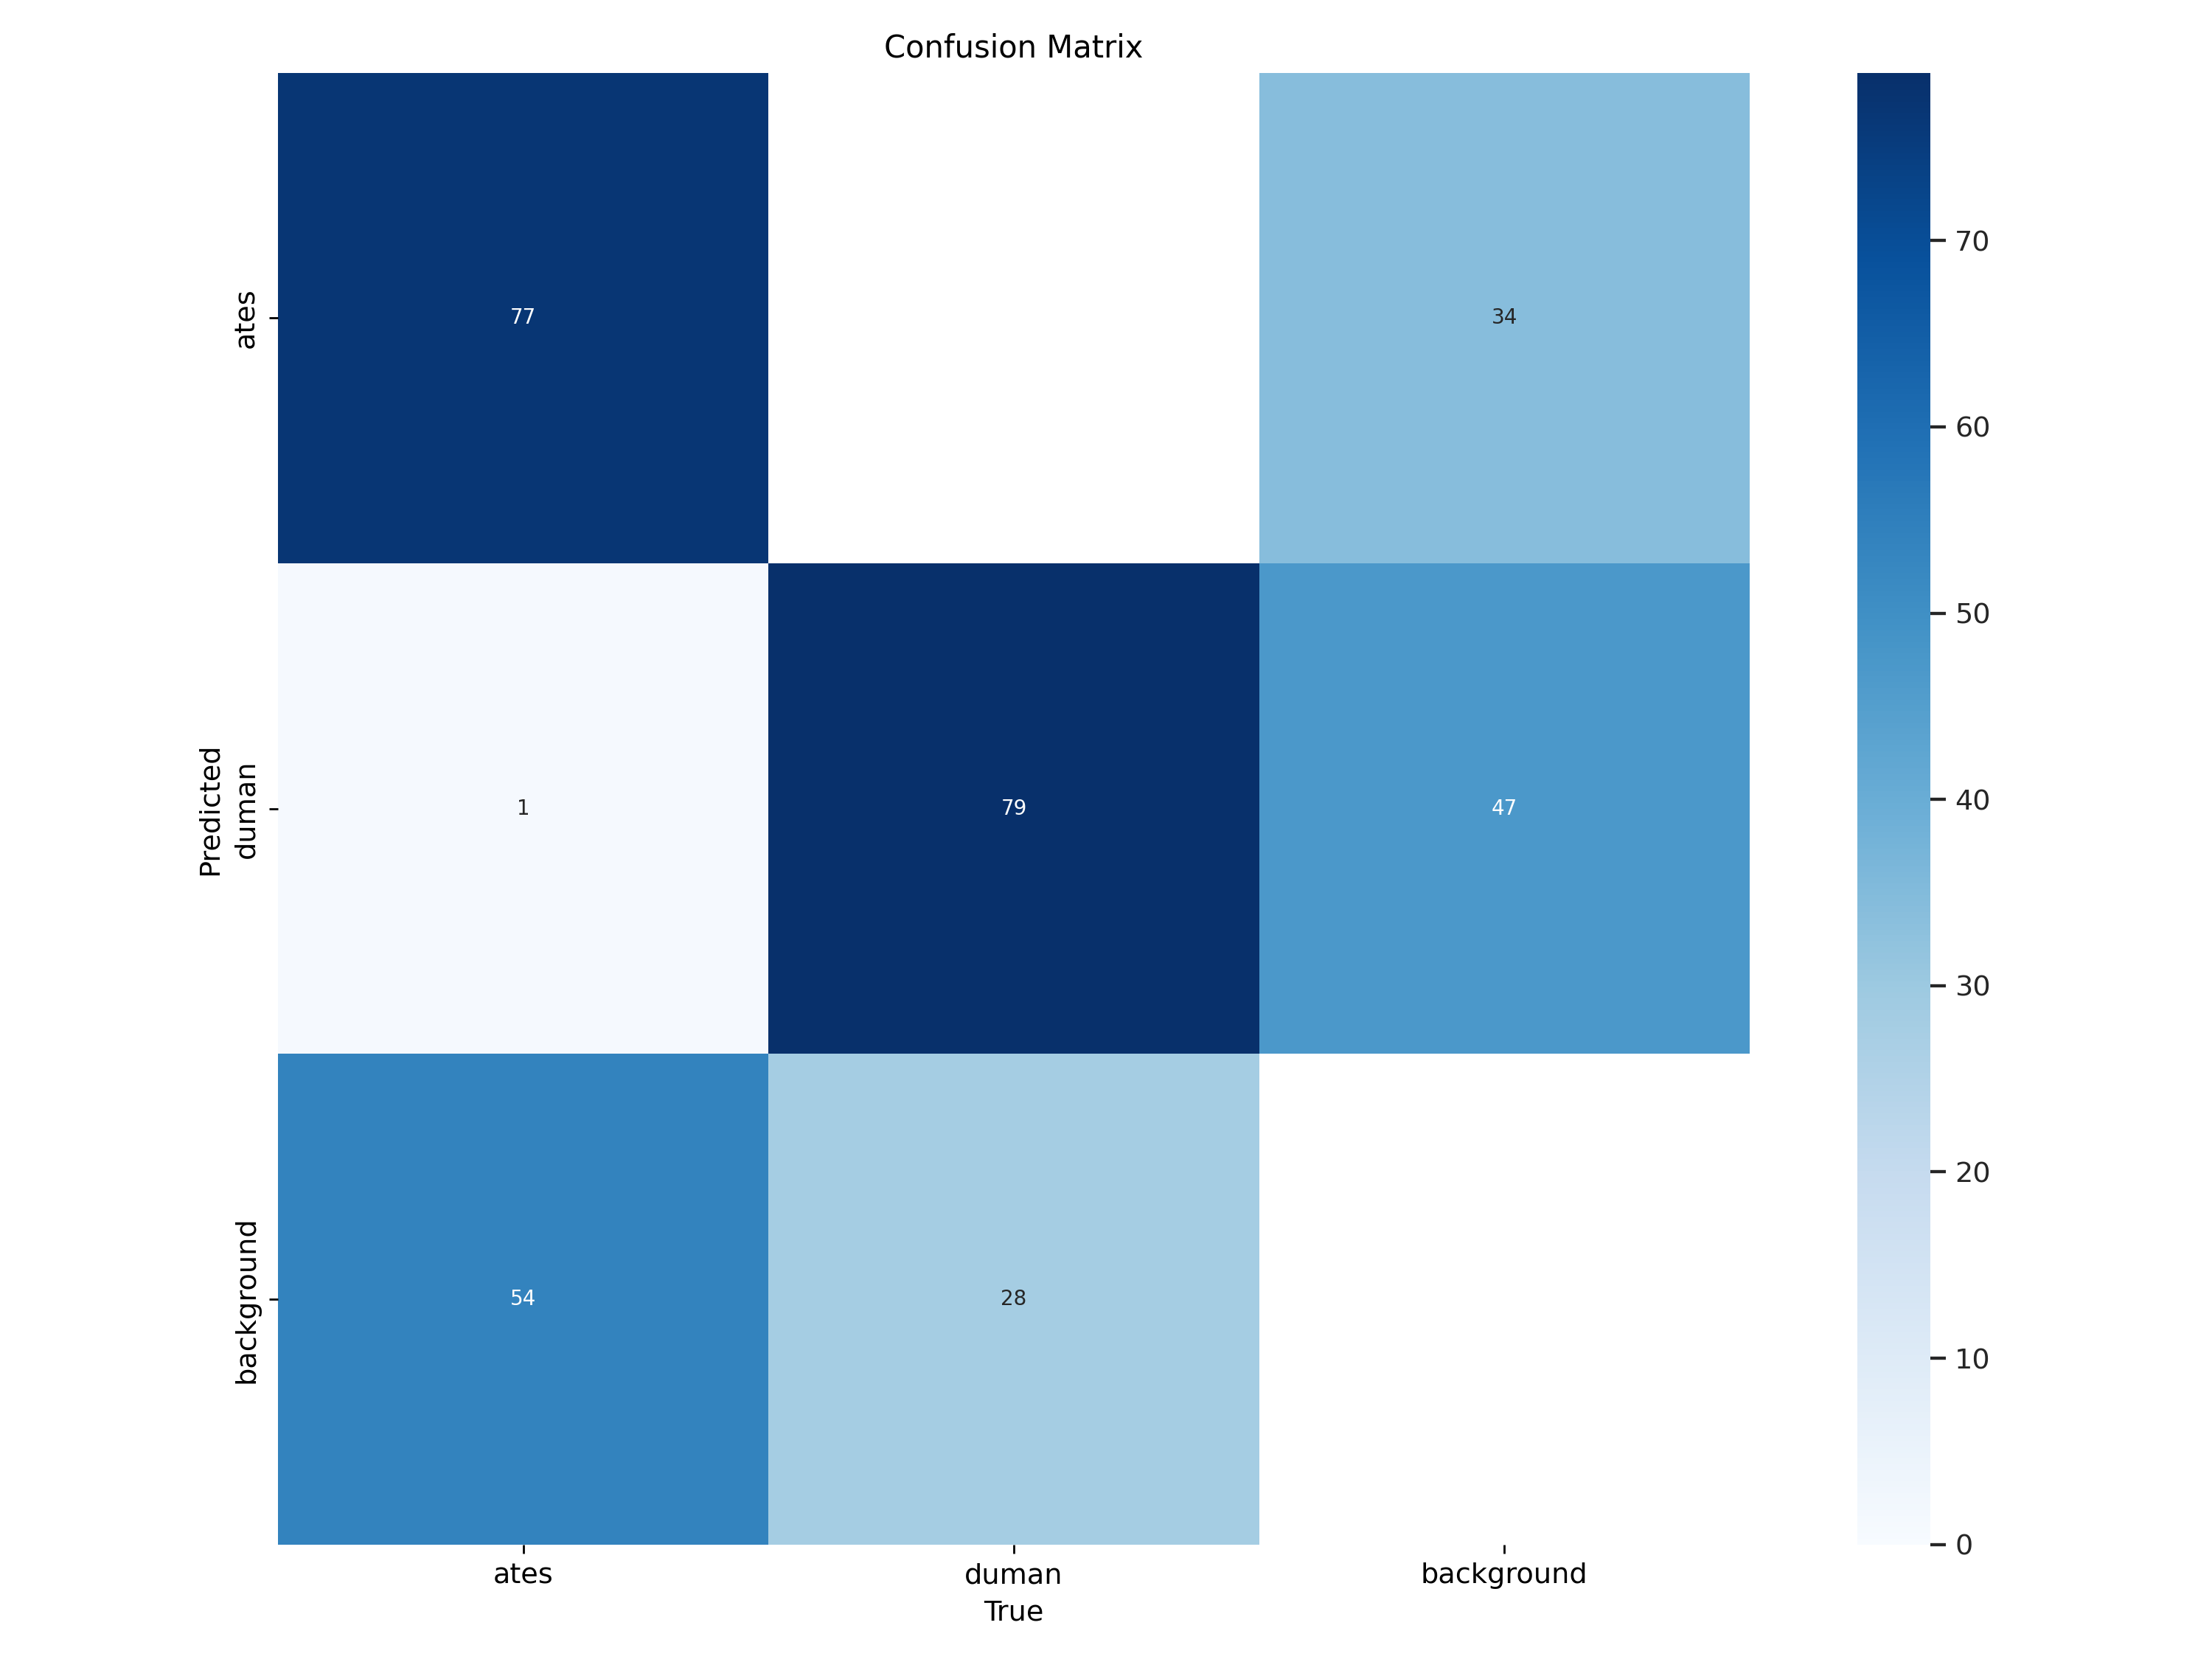

In [8]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Hangi

In [12]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source=/content/kk.mp4

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/2305) /content/kk.mp4: 448x640 (no detections), 104.9ms
video 1/1 (2/2305) /content/kk.mp4: 448x640 (no detections), 12.7ms
video 1/1 (3/2305) /content/kk.mp4: 448x640 (no detections), 12.7ms
video 1/1 (4/2305) /content/kk.mp4: 448x640 (no detections), 12.7ms
video 1/1 (5/2305) /content/kk.mp4: 448x640 (no detections), 12.6ms
video 1/1 (6/2305) /content/kk.mp4: 448x640 (no detections), 12.7ms
video 1/1 (7/2305) /content/kk.mp4: 448x640 2 atess, 12.6ms
video 1/1 (8/2305) /content/kk.mp4: 448x640 (no detections), 12.7ms
video 1/1 (9/2305) /content/kk.mp4: 448x640 (no detections), 12.6ms
video 1/1 (10/2305) /content/kk.mp4: 448x640 (no detections), 12.6ms
video 1/1 (11/2305) /content/kk.mp4: 448x640 (no detections), 12.6ms
video 1/1 (12/2305) /content/kk.mp4: 448x640 (no detections), 12.6ms
video 1/1 (13/2305)